In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import wfdb

%pip install wfdb


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [73]:
header = wfdb.rdheader('sudden-cardiac-death-holter-database-1.0.0/30')
print(header)

In [4]:
record = wfdb.rdrecord('sudden-cardiac-death-holter-database-1.0.0/30')  
ecg_signal_0 = record.p_signal[:, 0]  # Получение сигнала ЭКГ
ecg_signal_1 = record.p_signal[:, 1]
ecg_signal = record.p_signal
print(record.fs)
ecg_m = np.matrix(ecg_signal)
print(ecg_m)
print(ecg_signal.shape)
print(np.isnan(ecg_signal_1).sum())


250
[[ 0.06375  0.18125]
 [ 0.0725   0.1875 ]
 [ 0.08375  0.1925 ]
 ...
 [-0.985   -0.9625 ]
 [-1.      -0.965  ]
 [-0.9925  -0.95   ]]
(22099250, 2)
963


2 графика - так как 2 отведения 

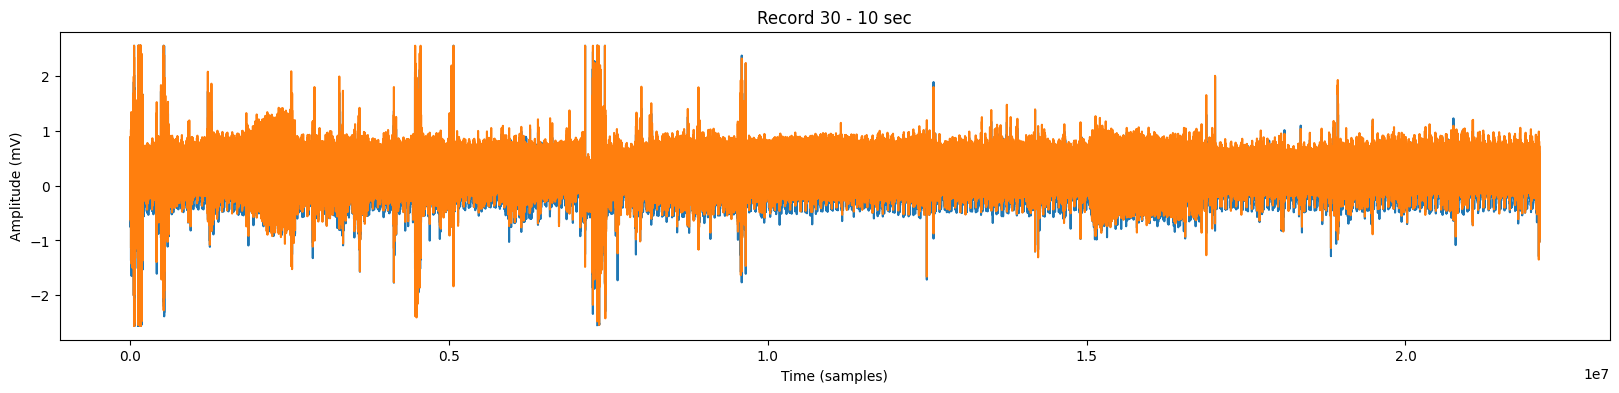

In [6]:
plt.figure(figsize=(20, 4))
plt.plot(ecg_signal)
plt.title('Record 30 - 10 sec')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.show()


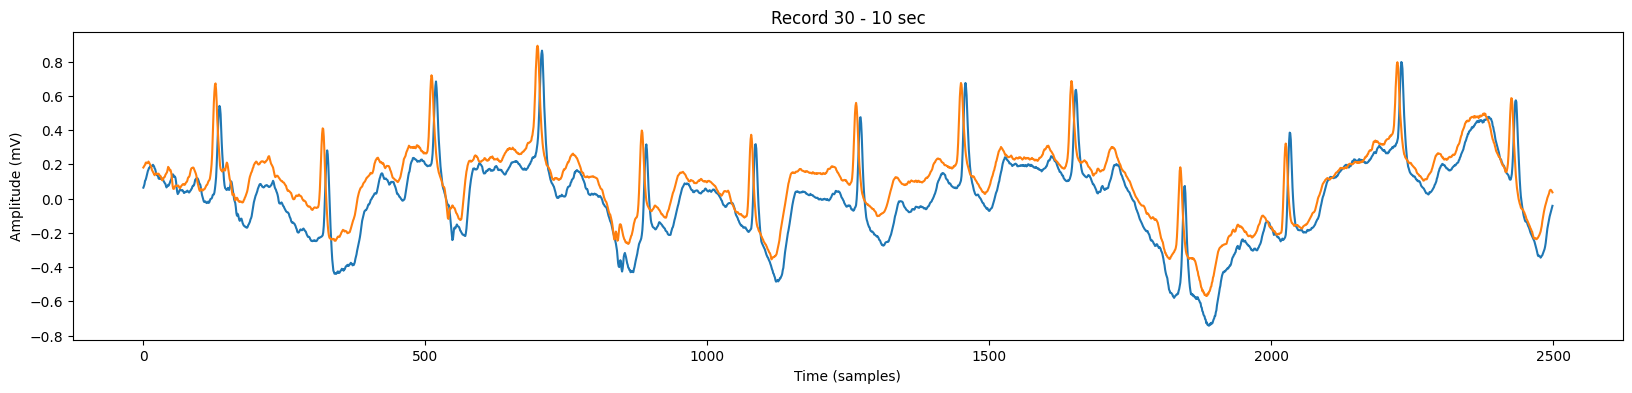

In [7]:
plt.figure(figsize=(20, 4))
plt.plot(ecg_signal[:2500])
plt.title('Record 30 - 10 sec')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.show()


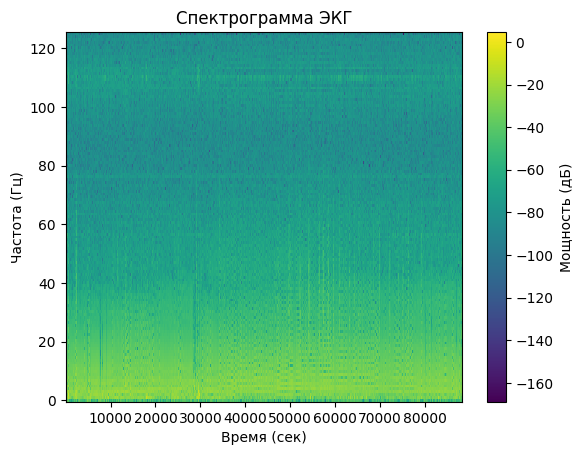

[[1.06634743e-07 5.04384856e-04 3.62202157e-04 ... 1.46677055e-05
  1.16057025e-06 1.26687689e-05]
 [4.83362462e-05 1.03072166e-02 6.79430990e-03 ... 1.84288598e-03
  5.09304394e-03 2.39149251e-02]
 [2.08291821e-03 4.63618194e-03 5.49166839e-03 ... 6.41914325e-04
  8.29683713e-04 3.42809305e-03]
 ...
 [9.84568739e-09 9.50498153e-09 1.00875725e-08 ... 7.91721593e-09
  1.13489529e-08 1.08518534e-08]
 [4.30712095e-09 5.27193974e-09 1.14192871e-08 ... 1.37901014e-08
  9.18043632e-09 5.70801334e-09]
 [5.97269518e-10 3.24726862e-09 3.63460790e-09 ... 1.17594610e-13
  2.63698619e-09 2.11107620e-09]]


In [8]:
frequencies, times, spectrogram = signal.spectrogram(ecg_signal_1, fs=record.fs)
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram))  # Применение логарифмической шкалы для лучшего отображения
plt.xlabel('Время (сек)')
plt.ylabel('Частота (Гц)')
plt.title('Спектрограмма ЭКГ')
plt.colorbar(label='Мощность (дБ)')
plt.show()
print(spectrogram)

## работа с частотами и тд..


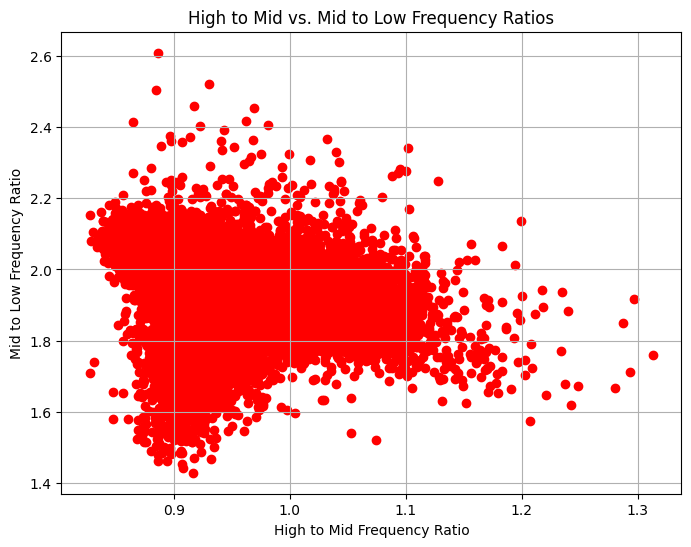

In [11]:
frequencies, times, spectrogram = signal.spectrogram(ecg_signal_1, fs=record.fs)
spectrogram =10 * np.log10(spectrogram)

high_freqs = np.sum(spectrogram[(frequencies >= 85) & (frequencies <= 125), :], axis=0)
mid_freqs = np.sum(spectrogram[(frequencies >= 40) & (frequencies <85), :], axis=0)
low_freqs = np.sum(spectrogram[(frequencies >= 0) & (frequencies < 40), :], axis=0)

high_to_mid = high_freqs / mid_freqs
mid_to_low = mid_freqs /low_freqs 

plt.figure(figsize=(8, 6))

plt.scatter(high_to_mid, mid_to_low, color='red')

plt.xlabel('High to Mid Frequency Ratio')
plt.ylabel('Mid to Low Frequency Ratio')
plt.title('High to Mid vs. Mid to Low Frequency Ratios')
plt.grid(True)
plt.show()


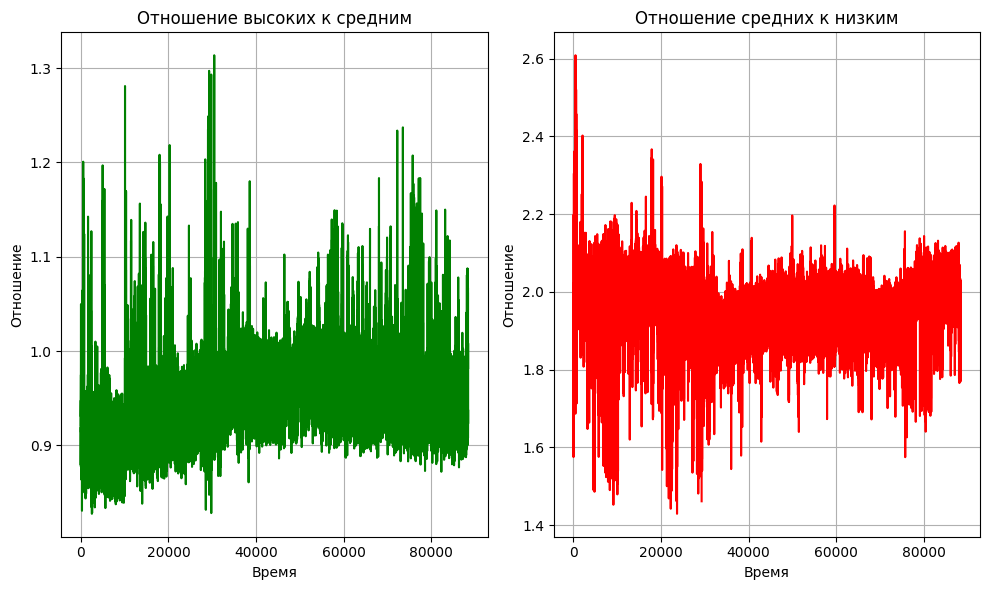

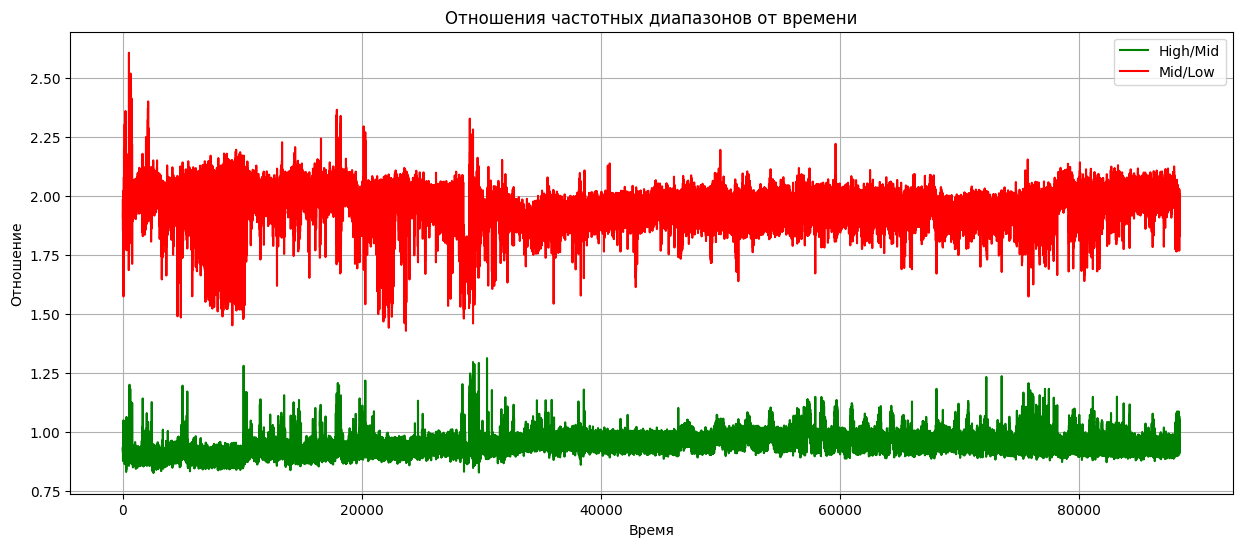

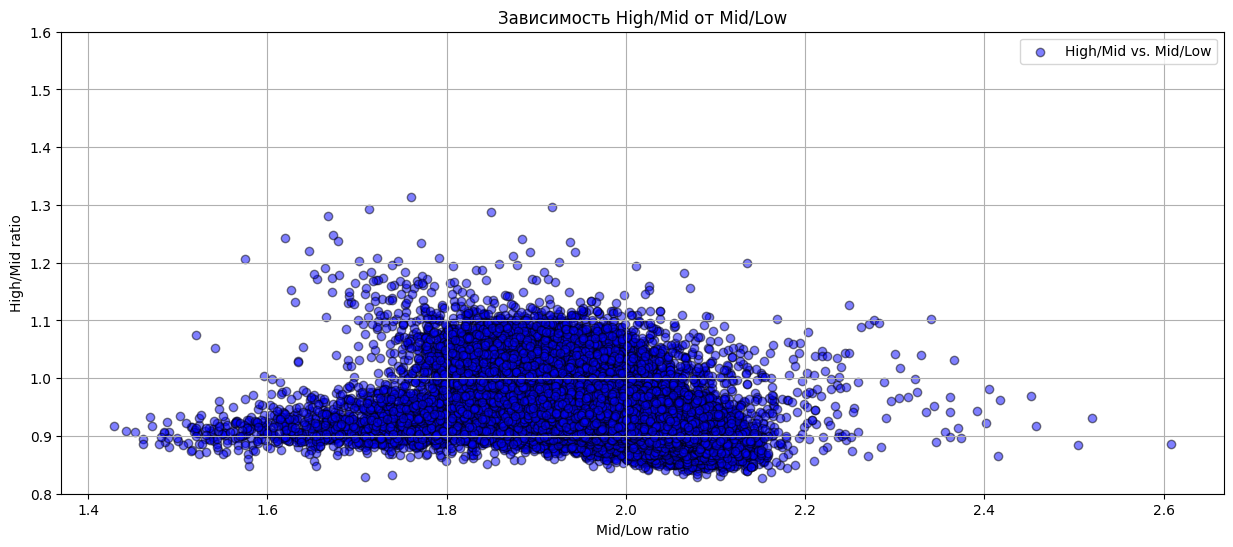

In [78]:
frequencies, times, spectrogram = signal.spectrogram(ecg_signal_1, fs=record.fs)
spectrogram =10 * np.log10(spectrogram)

high_freq_indices = np.where((frequencies >= 85) & (frequencies <= 125))[0]
mid_freq_indices = np.where((frequencies >= 40) & (frequencies < 85))[0]
low_freq_indices = np.where((frequencies >= 0) & (frequencies < 40))[0]

high_freq_sum = np.sum(spectrogram[high_freq_indices, :], axis=0)
mid_freq_sum = np.sum(spectrogram[mid_freq_indices, :], axis=0)
low_freq_sum = np.sum(spectrogram[low_freq_indices, :], axis=0)

high_to_mid_ratio = high_freq_sum / mid_freq_sum
mid_to_low_ratio = mid_freq_sum / low_freq_sum
# Первые графики
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(times, high_to_mid_ratio, color='green')
plt.title('Отношение высоких к средним')
plt.xlabel('Время')
plt.ylabel('Отношение')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(times, mid_to_low_ratio, color='red')
plt.title('Отношение средних к низким')
plt.xlabel('Время')
plt.ylabel('Отношение')
plt.grid(True)

plt.tight_layout() 
# Второй график

plt.figure(figsize=(15, 6))

plt.plot(times, high_to_mid_ratio, color='green', label='High/Mid')

plt.plot(times, mid_to_low_ratio, color='red', label='Mid/Low')

plt.legend()

plt.title('Отношения частотных диапазонов от времени')
plt.xlabel('Время')
plt.ylabel('Отношение')

plt.grid(True)
plt.show()

# последняя штука 

plt.figure(figsize=(15, 6))

# Используем scatter для построения графика точек
plt.scatter(mid_to_low_ratio, high_to_mid_ratio, color='blue', label='High/Mid vs. Mid/Low', alpha=0.5,  edgecolors='black')

plt.legend()

plt.title('Зависимость High/Mid от Mid/Low')
plt.xlabel('Mid/Low ratio')
plt.ylabel('High/Mid ratio')
plt.ylim(0.8, 1.6) 
plt.grid(True)
plt.show()



## Массив спектрограмм 

Вся спектрограмма

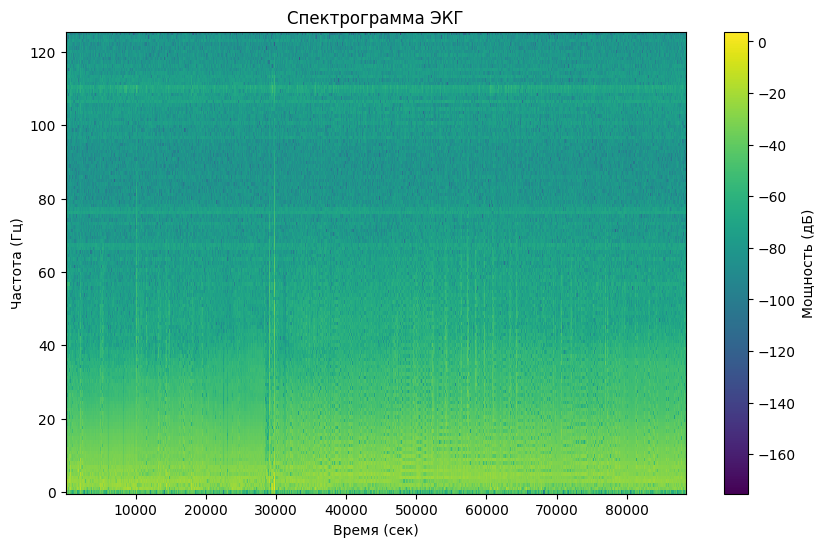

In [33]:
frequencies, times, spectrogram = signal.spectrogram(ecg_signal_0, fs=record.fs)
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram))  # Применение логарифмической шкалы для лучшего отображения

plt.xlabel('Время (сек)')
plt.ylabel('Частота (Гц)')
plt.title('Спектрограмма ЭКГ')
plt.colorbar(label='Мощность (дБ)')
plt.show()

Теперь нужно разбить по времени и получить двумерный график

Это работает и дальше, но очень много фоток получилось

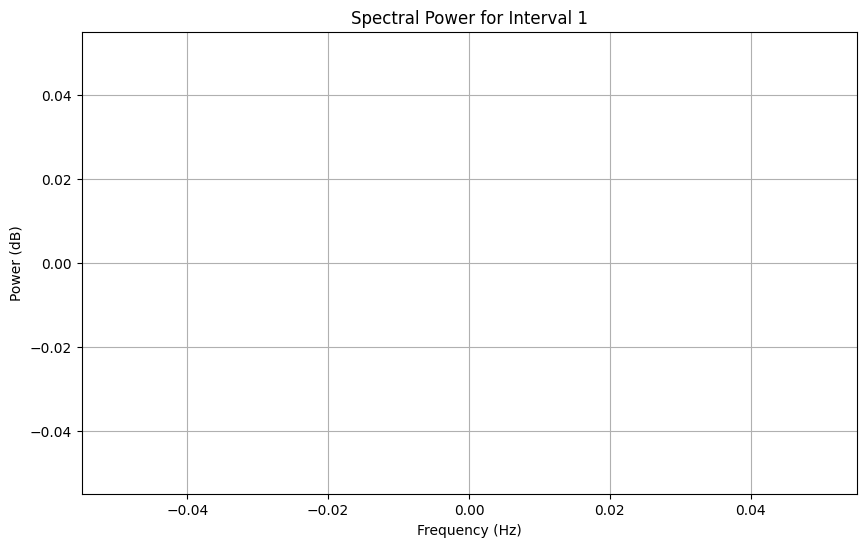

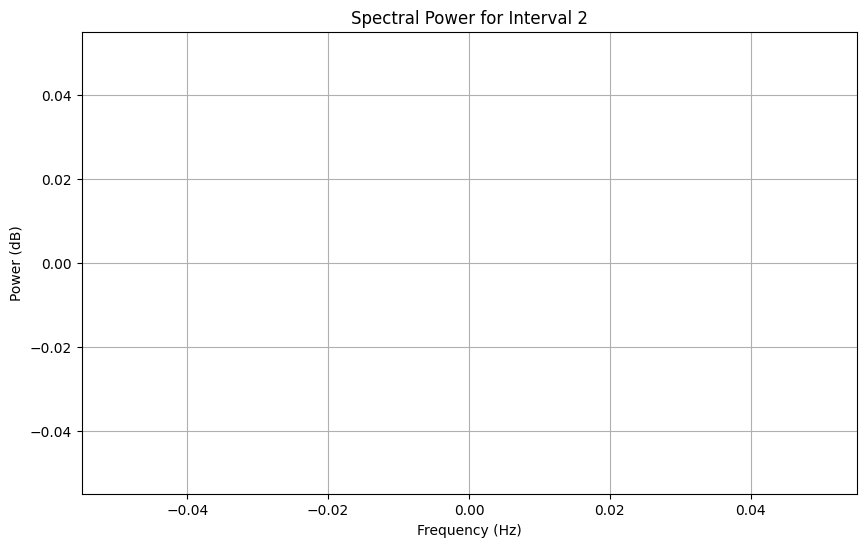

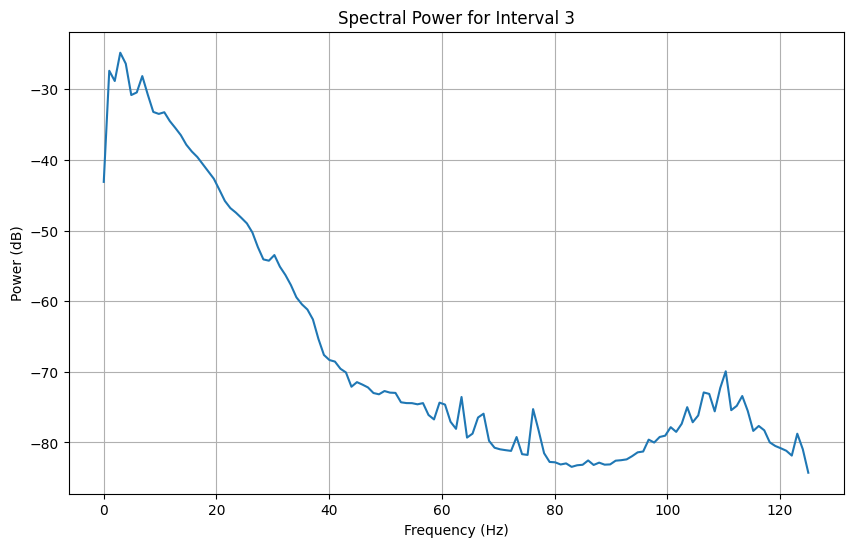

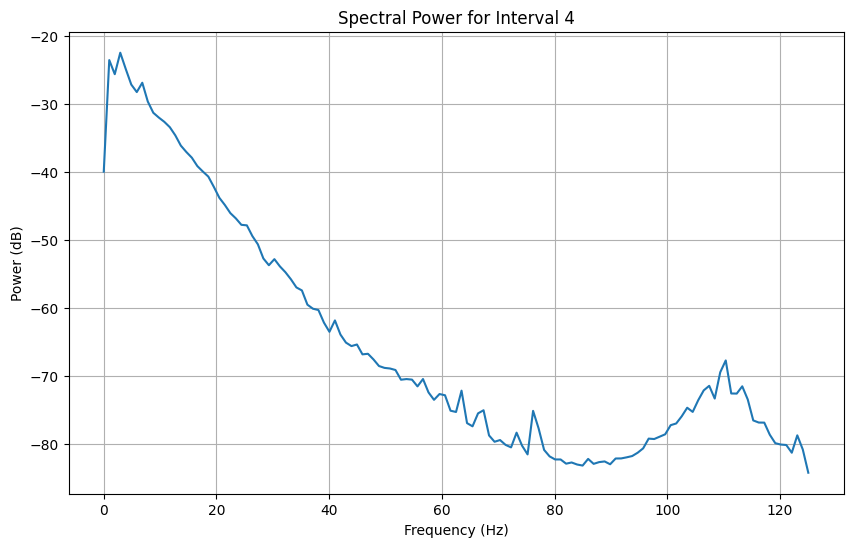

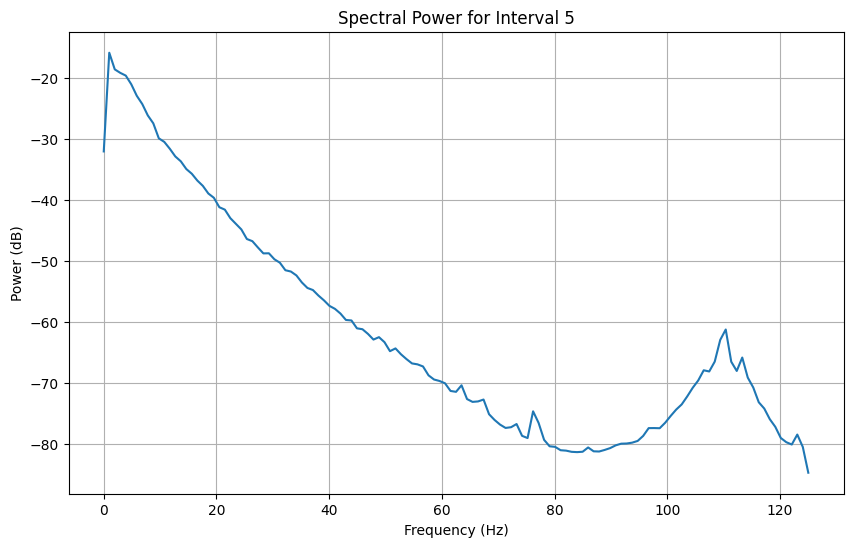

KeyboardInterrupt: 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


interval = 2  
nperseg = int(interval * record.fs)  

spectrogram_intervals = []
for i in range(0, len(times), nperseg):
    times_interval = times[i:i+nperseg]
    spectrogram_interval = spectrogram[:, i:i+nperseg]
    mean_spectrogram_interval = np.mean(spectrogram_interval, axis=1)
    spectrogram_intervals.append((frequencies, mean_spectrogram_interval))

for i, (frequencies, mean_spectrogram_interval) in enumerate(spectrogram_intervals):
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, 10 * np.log10(mean_spectrogram_interval))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (dB)')
    plt.title(f'Spectral Power for Interval {i+1}')
    plt.grid(True)
    plt.show()


In [39]:
import numpy as np
from scipy import signal

interval_duration = 2  
nperseg = int(interval_duration * record.fs)  

spectrogram_intervals = []
for i in range(0, len(times), nperseg):
    
    times_interval = times[i:i+nperseg]
    spectrogram_interval = spectrogram[:, i:i+nperseg]
    mean_spectrogram_interval = np.mean(spectrogram_interval, axis=1)
    spectrogram_intervals.append((frequencies, mean_spectrogram_interval))

for i, (frequencies, mean_spectrogram_interval) in enumerate(spectrogram_intervals):
    print(f'Interval {i+1}:')
    for freq, ampl in zip(frequencies, mean_spectrogram_interval):
        print(f'Frequency: {freq} Hz, Amplitude: {ampl}')


Interval 1:
Frequency: 0.0 Hz, Amplitude: nan
Frequency: 0.9765625 Hz, Amplitude: nan
Frequency: 1.953125 Hz, Amplitude: nan
Frequency: 2.9296875 Hz, Amplitude: nan
Frequency: 3.90625 Hz, Amplitude: nan
Frequency: 4.8828125 Hz, Amplitude: nan
Frequency: 5.859375 Hz, Amplitude: nan
Frequency: 6.8359375 Hz, Amplitude: nan
Frequency: 7.8125 Hz, Amplitude: nan
Frequency: 8.7890625 Hz, Amplitude: nan
Frequency: 9.765625 Hz, Amplitude: nan
Frequency: 10.7421875 Hz, Amplitude: nan
Frequency: 11.71875 Hz, Amplitude: nan
Frequency: 12.6953125 Hz, Amplitude: nan
Frequency: 13.671875 Hz, Amplitude: nan
Frequency: 14.6484375 Hz, Amplitude: nan
Frequency: 15.625 Hz, Amplitude: nan
Frequency: 16.6015625 Hz, Amplitude: nan
Frequency: 17.578125 Hz, Amplitude: nan
Frequency: 18.5546875 Hz, Amplitude: nan
Frequency: 19.53125 Hz, Amplitude: nan
Frequency: 20.5078125 Hz, Amplitude: nan
Frequency: 21.484375 Hz, Amplitude: nan
Frequency: 22.4609375 Hz, Amplitude: nan
Frequency: 23.4375 Hz, Amplitude: nan
Fr

In [ ]:
import numpy as np
from scipy import signal

# Определение параметров для интервала в 2 секунды
interval_duration = 2  # Продолжительность интервала в секундах
nperseg = int(interval_duration * record.fs)  # Количество отсчетов для интервала в 2 секунды

frequency_data = []
amplitude_data = []
for i in range(0, len(times), nperseg):
    
    times_interval = times[i:i+nperseg]
    spectrogram_interval = spectrogram[:, i:i+nperseg]
    mean_spectrogram_interval = np.mean(spectrogram_interval, axis=1)
    frequency_data.append(frequencies)
    amplitude_data.append(mean_spectrogram_interval)

frequency_data = np.array(frequency_data)
amplitude_data = np.array(amplitude_data)
